In [60]:
import numpy as np
import graspy
from scipy.special import gamma

from graspy.embed import MultipleASE, OmnibusEmbed

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
A = [np.genfromtxt(f"./data/data{i}.csv") for i in range(1, 13)]

In [81]:
stats = []
for i in range(len(A) - 1):
    omni = OmnibusEmbed(1).fit_transform(A[i:i+2])
    stats.append(np.linalg.norm(omni[0]-omni[1], ord=2))
    
stats = np.array(stats)

In [ ]:
	
1
0.7053423
2
0.6995793
3
0.6665466
4
0.6341338
5
4.9996071
6
4.9538934
7
0.6618963
8
0.6775521
9
0.6503313
10
0.7361738
11
0.6500253


In [108]:
stats[3:]

array([0.63125984, 4.9746039 , 4.92913709, 0.65879168, 0.6744603 ,
       0.64743859, 0.73283124, 0.64703229])

In [84]:
diffs = np.abs(np.diff(stats))
diffs

array([0.00583689, 0.03324517, 0.03177637, 4.34334406, 0.04546681,
       4.27034542, 0.01566862, 0.0270217 , 0.08539264, 0.08579895])

	
1
0.01719670
2
0.02900955
3
1.94941763
4
1.95531343
5
1.92274415
6
1.90942060
7
0.01900559
8
0.05011674


In [98]:
l = 4

stds = []
for i in range(len(A)-l):
    stds.append(diffs[i:i+l-2].sum() / (1.128*(l-2)))
    
stds = np.array(stds)

In [99]:
stds

array([0.01732361, 0.0288216 , 1.93932643, 1.94539489, 1.91303733,
       1.89982892, 0.01892301, 0.04982905])

In [104]:
stats_mean = []

for i in range(len(A)):
    if i >= 4:
        stats_mean.append(stats[i-l:i-1].sum() / 3)

In [105]:
lower = stats_mean - 3 * stds
upper = stats_mean + 3 * stds

In [109]:
stats_mean

[0.687145282615711,
 0.6635258068115965,
 2.0896333152922852,
 3.5116669442656545,
 3.5208442238132105,
 2.087463021527574,
 0.6602301887196483,
 0.684910042664789]

In [110]:
stds

array([0.01732361, 0.0288216 , 1.93932643, 1.94539489, 1.91303733,
       1.89982892, 0.01892301, 0.04982905])

In [111]:
upper

array([0.73911611, 0.74999062, 7.90761261, 9.34785162, 9.25995623,
       7.78694977, 0.71699923, 0.8343972 ])

/Users/j1c/miniconda3/envs/j1c/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


[Text(-1.0, 0, '3:4'),
 Text(0.0, 0, '4:5'),
 Text(1.0, 0, '5:6'),
 Text(2.0, 0, '6:7'),
 Text(3.0, 0, '7:8'),
 Text(4.0, 0, '8:9'),
 Text(5.0, 0, '9:10'),
 Text(6.0, 0, '10:11'),
 Text(7.0, 0, '11:12'),
 Text(8.0, 0, '12:13')]

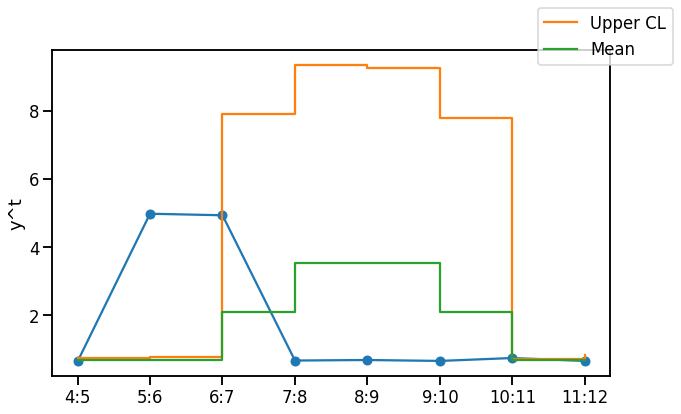

In [129]:
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(len(stats[3:])), stats[3:], 'o-')
#ax.step(range(len(stats[3:])), lower, where='post', label='Lower CL')
ax.step(range(len(stats[3:])), upper, where='post', label='Upper CL')
ax.step(range(len(stats[3:])), stats_mean, where='post', label='Mean')

fig.legend()

ax.set_ylabel("y^t")
ax.set_xticklabels([f"{i}:{i+1}" for i in range(3,13)])

In [130]:
fig.savefig('test.png', dpi=300, bbox_inches='tight')